In [1]:
import pandas as pd
import numpy as np

In [2]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0,parse_dates=True).dropna()

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [4]:
data = pd.DataFrame(raw['XAU='])

In [5]:
data.rename(columns={'XAU=':'price'},inplace=True)

In [6]:
data['returns'] =np.log(data['price']/data['price'].shift(1))

In [7]:
data['position'] = np.sign(data['returns'])

In [8]:
data['strategy'] = data['position'].shift(1)*data['returns']

<Axes: xlabel='Date'>

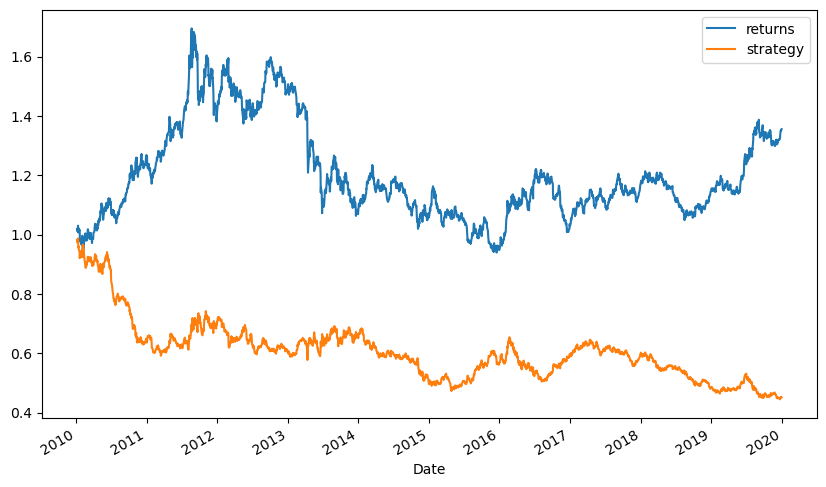

In [9]:
data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

In [10]:
data['position'] = np.sign(data['returns'].rolling(3).mean())

In [11]:
data['strategy'] = data['position'].shift(1)*data['returns']

<Axes: xlabel='Date'>

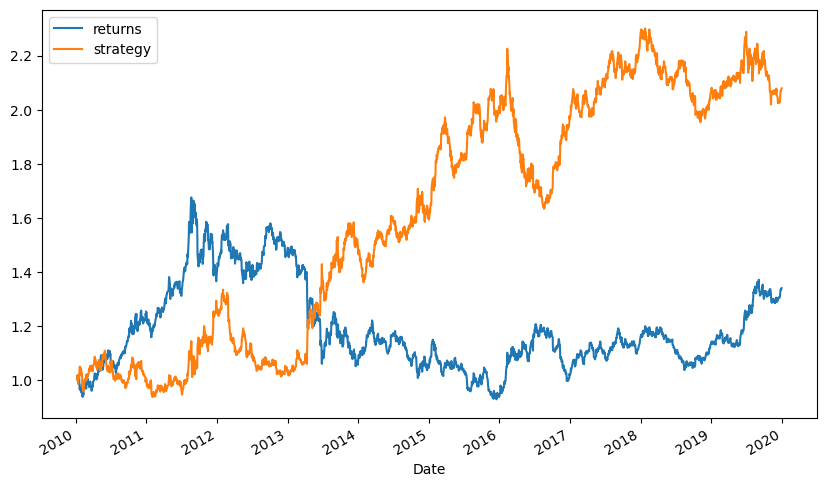

In [12]:
data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

In [13]:
fn = './data/AAPL_1D.csv'

In [15]:
data = pd.read_csv(fn,index_col=0,parse_dates=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8853 entries, 2025-03-07 to 1990-01-03
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      8853 non-null   float64
 1   high      8853 non-null   float64
 2   low       8853 non-null   float64
 3   close     8853 non-null   float64
 4   % change  8853 non-null   float64
dtypes: float64(5)
memory usage: 415.0 KB


In [23]:
data['returns'] = np.log(data['close']/data['close'].shift(1))

In [24]:
data['returns']

datetime
2025-03-07         NaN
2025-03-06   -0.012484
2025-03-05    0.001654
2025-03-04   -0.000848
2025-03-03    0.009202
                ...   
1990-01-09    0.044114
1990-01-08    0.009626
1990-01-05   -0.006654
1990-01-04   -0.002972
1990-01-03   -0.003727
Name: returns, Length: 8853, dtype: float64

In [25]:
to_plot = ['returns']

In [26]:
for m in [1,3,5,7,9]:
    data['position_%d'% m] = np.sign(data['returns'].rolling(m).mean())
    data['strategy_%d'% m] = (data['position_%d'%m].shift(1)*data['returns'])
    to_plot.append('strategy_%d' % m)

<Axes: title={'center': 'AAPL intraday 05. MAY 2020'}, xlabel='datetime'>

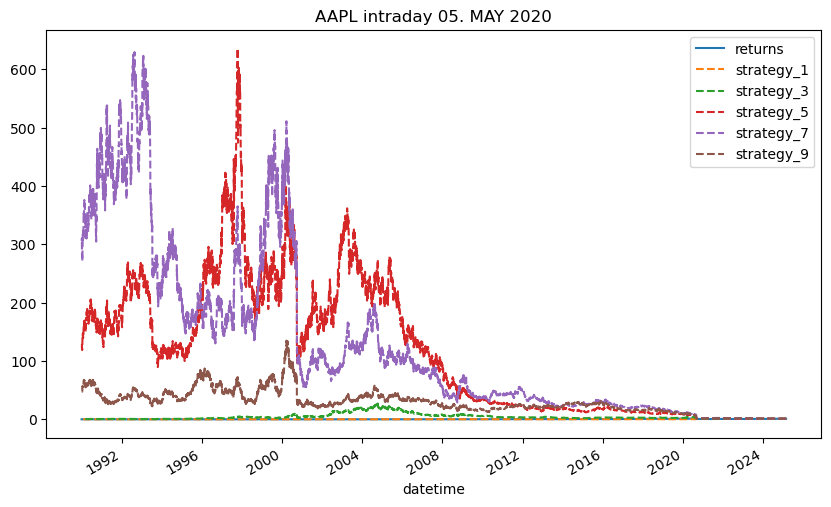

In [27]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='AAPL intraday 05. MAY 2020',
    figsize=(10,6),style=['-','--','--','--','--','--']
)